![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (50+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [Calling Functions Directly](#calling-functions-directly)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://site.financialmodelingprep.com/developer/docs/pricing/jeroen/">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a *15% discount*. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use [their contact form](https://site.financialmodelingprep.com/contact) or provide the data yourself. 

Within this package the following things are included:

- Company profiles (`profile`), including country, sector, ISIN and general characteristics (from FinancialModelingPrep)
- Company quotes (`quote`), including 52 week highs and lows, volume metrics and current shares outstanding (from FinancialModelingPrep)
- Market cap and enterprise values (`enterprise`), including every intermediate step (from FinancialModelingPrep)
- Company ratings (`rating`), based on key indicators like PE and DE ratios (from FinancialModelingPrep)
- Historical market data (`historical_data`), which can be retrieved on a daily, weekly, monthly and yearly basis (from Yahoo Finance)
- Balance Sheet Statements (`balance_sheet_statement`), Income Statements (`income_statement`), Cash Flow Statements (`cash_flow_statement`) and Statistics Statement (`statistics_statement`), obtainable from FinancialModelingPrep or the source of your choosing through custom input. These functions are accompanied with a normalization function so that for any source, the same ratio analysis can be performed. Please see this Jupyter Notebook that explains how to use a custom source.
- Efficiency ratios (`efficiency_ratios`), liquidity ratios (`liquidity_ratios`), profitability ratios (`profitability_ratios`), solvency ratios (`solvency_ratios`) and valuation ratios (`valuation_ratios`) functionality that automatically calculates the most important ratios based on the inputted balance sheet, income and cash flow statements. Next to that, it is also possible to input your own custom ratios (`custom_ratios`).
- Models (`models`) like DUPONT analysis that can be used to perform in-depth financial analysis through a single function.

The dependencies of the package are on purpose *very slim* so that it will work well with any combination of packages and not result in conflicts. I've also been careful with my selection in which I leave out functionality like technical analysis in which [ta-lib](https://ta-lib.org/) does an excellent job as well as portfolio attribution and optimisation in which [Riskfolio-lib](https://riskfolio-lib.readthedocs.io/en/latest/index.html) shines.

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FMP_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2000-01-01"
)

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2023-07-18  193.729996  132.830002  123.760002  359.489990  193.729996   
2023-07-19  195.100006  135.360001  122.029999  355.079987  195.100006   
2023-07-20  193.130005  129.960007  119.199997  346.869995  193.130005   
2023-07-21  191.940002  130.000000  120.019997  343.769989  191.940002   
2023-07-24  192.750000  128.800003  121.529999  345.109985  192.750000   
2023-07-25  193.619995  129.130005  122.209999  350.980011  193.619995   
2023-07-26  194.500000  128.149994  129.270004  337.769989  194.500000   
2023-07-27  193.220001  128.250000  129.399994  330.720001  193.220001   
2023-07-28  195.830002  132.210007  132.580002  338.369995  195.830002   
2023-07-31  196.449997  133.679993  132.720001  335.920013  196.449997   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2023-07-18  132.830002  123.760002  359.489990  194.330002  133.860001  ...   
2023-07-19  135.360001  122.029999  355.079987  198.229996  135.990005  ...   
2023-07-20  129.960007  119.199997  346.869995  196.470001  134.789993  ...   
2023-07-21  130.000000  120.019997  343.769989  194.970001  131.369995  ...   
2023-07-24  128.800003  121.529999  345.109985  194.910004  131.660004  ...   
2023-07-25  129.130005  122.209999  350.980011  194.440002  129.580002  ...   
2023-07-26  128.149994  129.270004  337.769989  195.639999  129.080002  ...   
2023-07-27  128.250000  129.399994  330.720001  197.199997  132.630005  ...   
2023-07-28  132.210007  132.580002  338.369995  196.630005  133.009995  ...   
2023-07-31  133.679993  132.720001  335.920013  196.490005  133.869995  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2023-07-18  122.959999  342.170013  193.350006  132.710007  124.599998   
2023-07-19  121.800003  352.440002  193.100006  133.389999  124.599998   
2023-07-20  118.220001  345.369995  195.089996  134.070007  121.419998   
2023-07-21  118.730003  339.829987  194.100006  131.339996  120.620003   
2023-07-24  120.980003  342.309998  193.410004  130.309998  121.660004   
2023-07-25  121.019997  345.070007  193.330002  129.309998  121.360001   
2023-07-26  128.320007  333.109985  193.669998  126.510002  130.070007   
2023-07-27  128.789993  329.049988  196.020004  131.000000  131.669998   
2023-07-28  130.570007  333.170013  194.669998  129.690002  130.779999   
2023-07-31  131.779999  333.359985  196.059998  133.199997  132.729996   

                          Volume                                   
                  MSFT      AAPL       AMZN       GOOGL      MSFT  
Date                                                               
2023-07-18  345.829987  48353800   54969100  26226400.0  64872700  
2023-07-19  361.750000  80507300   54531000  37224000.0  39732900  
2023-07-20  353.570007  59581200   59820600  37906800.0  33778400  
2023-07-21  349.149994  71917800  133265000  72937900.0  69368900  
2023-07-24  345.850006  45377800   45591100  29686100.0  26678100  
2023-07-25  347.109985  37283200   39236700  52509600.0  41637700  
2023-07-26  341.440002  47471900   53910100  61682100.0  58383700  
2023-07-27  340.480011  47460200   52610700  44952100.0  39635300  
2023-07-28  333.670013  48254600   46234700  36572900.0  28463000  
2023-07-31  336.920013  38778100   41821800  28037700.0  25421600  

[10 rows x 24 columns]

Adj Close                                           Close              \
            AAPL        AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                           
1999    0.780221    3.806250         NaN   36.340618    0.917969    3.806250   
2000    0.225766    0.778125         NaN   13.501280    0.265625    0.778125   
2001    0.332388    0.541000         NaN   20.621546    0.391071    0.541000   
2002    0.217494    0.944500         NaN   16.092594    0.255893    0.944500   
2003    0.324344    2.631000         NaN   17.189528    0.381607    2.631000   
2004    0.977434    2.214500    4.824575   18.758617    1.150000    2.214500   
2005    2.182228    2.357500   10.381882   18.582623    2.567500    2.357500   
2006    2.575326    1.973000   11.523524   21.525982    3.030000    1.973000   
2007    6.012739    4.632000   17.304304   26.012627    7.074286    4.632000   
2008    2.590807    2.564000    7.698949   14.466762    3.048214    2.564000   
2009    6.396729    6.726000   15.515015   23.214411    7.526071    6.726000   
2010    9.791343    9.000000   14.864114   21.699745   11.520000    9.000000   
2011   12.293813    8.655000   16.163664   20.719856   14.464286    8.655000   
2012   16.297531   12.543500   17.702202   21.921370   19.006071   12.543500   
2013   17.612658   19.939501   28.045795   31.632103   20.036428   19.939501   
2014   24.767366   15.517500   26.533001   40.351353   27.594999   15.517500   
2015   24.020948   33.794498   38.900501   49.507835   26.315001   33.794498   
2016   27.018860   37.493500   39.622501   56.972511   28.955000   37.493500   
2017   40.113377   58.473499   52.669998   80.177780   42.307499   58.473499   
2018   37.951199   75.098503   52.248001   96.850960   39.435001   75.098503   
2019   71.711731   92.391998   66.969498  152.596573   73.412498   92.391998   
2020  130.735306  162.846497   87.632004  217.502060  132.690002  162.846497   
2021  176.032745  166.716995  144.852005  331.640472  177.570007  166.716995   
2022  129.552719   84.000000   88.230003  238.699020  129.929993   84.000000   
2023  196.449997  133.679993  132.720001  335.920013  196.449997  133.679993   

                                    High              ...         Low  \
           GOOGL        MSFT        AAPL        AMZN  ...       GOOGL   
Date                                                  ...               
1999         NaN   58.375000    0.918527    3.968750  ...         NaN   
2000         NaN   21.687500    0.267857    0.856250  ...         NaN   
2001         NaN   33.125000    0.404643    0.559500  ...         NaN   
2002         NaN   25.850000    0.256429    0.978000  ...         NaN   
2003         NaN   27.370001    0.384464    2.674000  ...         NaN   
2004    4.824575   26.719999    1.160714    2.274500  ...    4.818819   
2005   10.381882   26.150000    2.586786    2.410000  ...   10.353854   
2006   11.523524   29.860001    3.050000    2.012500  ...   11.508008   
2007   17.304304   35.599998    7.160714    4.718500  ...   17.281782   
2008    7.698949   19.440001    3.133571    2.584500  ...    7.572823   
2009   15.515015   30.480000    7.619643    6.864000  ...   15.515015   
2010   14.864114   27.910000   11.552857    9.115000  ...   14.815566   
2011   16.163664   25.959999   14.510000    8.758500  ...   16.066566   
2012   17.702202   26.709999   19.121429   12.620500  ...   17.417418   
2013   28.045795   37.410000   20.045713   19.941500  ...   27.684183   
2014   26.533001   46.450001   28.282499   15.649000  ...   26.510000   
2015   38.900501   55.480000   26.757500   34.387501  ...   38.866001   
2016   39.622501   62.139999   29.299999   38.369999  ...   39.480999   
2017   52.669998   85.540001   42.647499   59.200001  ...   52.634998   
2018   52.248001  101.570000   39.840000   76.038002  ...   51.652000   
2019   66.969498  157.699997   73.419998   92.663002  ...   66.606499   
2020   87.6320

<Axes: xlabel='Date'>

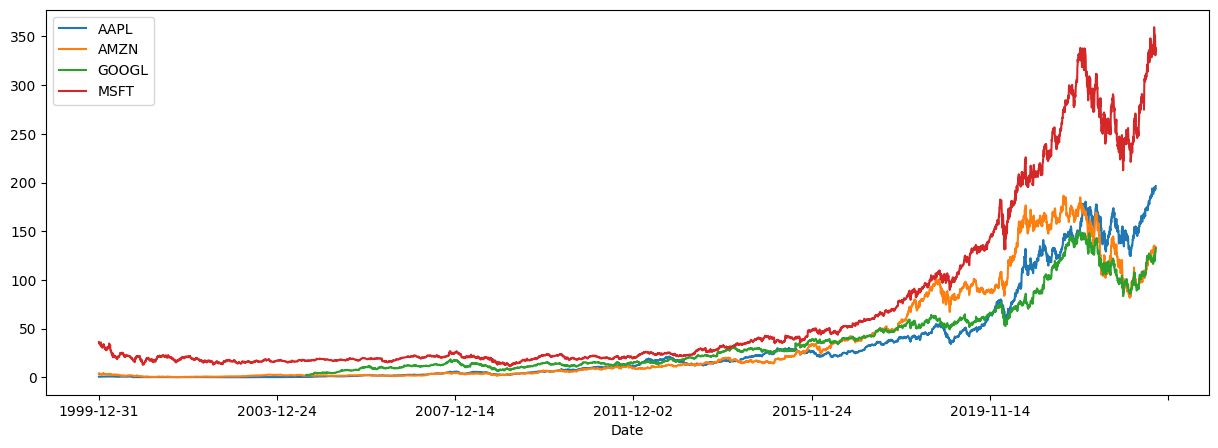

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data().tail(10))

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Adjusted Close Prices
companies.get_historical_data()["Adj Close"].plot(figsize=(15, 5))

In [4]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

date                                          2000          2001  \
AAPL Cash and Cash Equivalents        1.191000e+09  2.310000e+09   
     Short Term Investments           2.836000e+09  2.026000e+09   
     Cash and Short Term Investments  4.027000e+09  4.336000e+09   
     Accounts Receivable              9.530000e+08  4.660000e+08   
     Inventory                        3.300000e+07  1.100000e+07   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     5.215000e+10  5.925700e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -4.846000e+09 -3.922000e+09   

date                                          2002          2003  \
AAPL Cash and Cash Equivalents        2.252000e+09  3.396000e+09   
     Short Term Investments           2.085000e+09  1.170000e+09   
     Cash and Short Term Investments  4.337000e+09  4.566000e+09   
     Accounts Receivable              5.650000e+08  9.500000e+08   
     Inventory                        4.500000e+07  5.600000e+07   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     6.764600e+10  7.957100e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -3.016000e+09 -6.438000e+09   

date                                          2004          2005  \
AAPL Cash and Cash Equivalents        2.969000e+09  3.491000e+09   
     Short Term Investments           2.495000e+09  4.770000e+09   
     Cash and Short Term Investments  5.464000e+09  8.261000e+09   
     Accounts Receivable              1.050000e+09  1.312000e+09   
     Inventory                        1.010000e+08  1.650000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     9.238900e+10  7.081500e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -1.598200e+10 -4.851000e+09   

date                                          2006          2007  \
AAPL Cash and Cash Equivalents        6.392000e+09  9.352000e+09   
     Short Term Investments           3.718000e+09  6.034000e+09   
     Cash and Short Term Investments  1.011000e+10  1.538600e+10   
     Accounts Receivable              2.845000e+09  4.029000e+09   
     Inventory                        2.700000e+08  3.460000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     6.959700e+10  6.317100e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -6.714000e+09 -6.111000e+09   

date                                          2008          2009  ...  \
AAPL Cash and Cash Equivalents        1.187500e+10  5.263000e+09  ...   
     Short Term Investments           1.261500e+10  1.820100e+10  ...   
     Cash and Short Term Investments  2.449000e+10  2.346400e+10  ...   
     Accounts Receivable              2.422000e+09  3.361000e+09  ...   
     Inventory                        5.090000e+08  4.550000e+08  ...   
...                                            ...           ...  ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00  ...   
     Total Liabilities and Equity     7.279300e+10  7.788800e+10  ...   
     Total Investments                1.991100e+10  3.030400e+10  ...   
  

In [5]:
# Obtain the income statements from each company
companies.get_income_statement()

date                                            2000          2001  \
AAPL Revenue                            7.983000e+09  5.363000e+09   
     Cost of Goods Sold                 5.817000e+09  4.128000e+09   
     Gross Profit                       2.166000e+09  1.235000e+09   
     Gross Profit Ratio                 2.713266e-01  2.302816e-01   
     Research and Development Expenses  3.800000e+08  4.410000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   4.103938e-01  2.904016e-01   
     EPS                                9.050000e-01  6.900000e-01   
     EPS Diluted                        8.500000e-01  6.600000e-01   
     Weighted Average Shares            1.037800e+10  1.068200e+10   
     Weighted Average Shares Diluted    1.107200e+10  1.114800e+10   

date                                            2002          2003  \
AAPL Revenue                            5.742000e+09  6.207000e+09   
     Cost of Goods Sold                 4.139000e+09  4.499000e+09   
     Gross Profit                       1.603000e+09  1.708000e+09   
     Gross Profit Ratio                 2.791710e-01  2.751732e-01   
     Research and Development Expenses  4.470000e+08  4.710000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   2.760092e-01  3.104670e-01   
     EPS                                7.250000e-01  9.300000e-01   
     EPS Diluted                        7.050000e-01  9.200000e-01   
     Weighted Average Shares            1.081200e+10  1.072300e+10   
     Weighted Average Shares Diluted    1.110600e+10  1.088200e+10   

date                                            2004          2005  \
AAPL Revenue                            8.279000e+09  1.393100e+10   
     Cost of Goods Sold                 6.020000e+09  9.888000e+09   
     Gross Profit                       2.259000e+09  4.043000e+09   
     Gross Profit Ratio                 2.728590e-01  2.902161e-01   
     Research and Development Expenses  4.890000e+08  5.340000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   2.217456e-01  3.079823e-01   
     EPS                                7.600000e-01  1.130000e+00   
     EPS Diluted                        7.500000e-01  1.120000e+00   
     Weighted Average Shares            1.080300e+10  1.083900e+10   
     Weighted Average Shares Diluted    1.089400e+10  1.090600e+10   

date                                            2006          2007  \
AAPL Revenue                            1.931500e+10  2.400600e+10   
     Cost of Goods Sold                 1.371700e+10  1.585200e+10   
     Gross Profit                       5.598000e+09  8.154000e+09   
     Gross Profit Ratio                 2.898266e-01  3.396651e-01   
     Research and Development Expenses  7.120000e+08  7.820000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   2.845174e-01  2.751262e-01   
     EPS                                1.210000e+00  1.440000e+00   
     EPS Diluted                        1.200000e+00  1.420000e+00   
     Weighted Average Shares            1.043800e+10  9.742000e+09   
     Weighted Average Shares Diluted    1.053100e+10  9.886000e+09   

date                                            2008          2009  ...  \
AAPL Revenue                            3.247900e+10  3.653700e+10  ...   
     Cost of Goods Sold                 2.133400e+10  2.339700e+10  ...   
     Gross Profit                       1.114500e+10  1.314000e+10  ...   
     Gross Profit Ratio                 3.431448e-01  3.596354e-01  ...   
     Research and Development Expenses  1.109000e+09  1.333000e+09  ...   
...                                              ...           ...  ...   
MSFT Net Income Ratio                   2.926349e-01  2.493112e-01  ...   
     EPS                            

In [6]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

date                                        2000          2001          2002  \
AAPL Net Income                     7.860000e+08 -3.700000e+07  6.500000e+07   
     Depreciation and Amortization  8.400000e+07  1.020000e+08  1.180000e+08   
     Deferred Income Tax            1.630000e+08 -3.600000e+07 -3.400000e+07   
     Stock Based Compensation       0.000000e+00  0.000000e+00  0.000000e+00   
     Change in Working Capital      1.570000e+08  2.110000e+08 -1.030000e+08   
...                                          ...           ...           ...   
MSFT Cash End of Period             4.846000e+09  3.922000e+09  3.016000e+09   
     Cash Beginning of Period       4.975000e+09  4.846000e+09  3.922000e+09   
     Operating Cash Flow            1.396100e+10  1.342200e+10  1.450900e+10   
     Capital Expenditure           -8.790000e+08 -1.103000e+09 -7.700000e+08   
     Free Cash Flow                 1.308200e+10  1.231900e+10  1.373900e+10   

date                                        2003          2004          2005  \
AAPL Net Income                     6.800000e+07  2.760000e+08  1.335000e+09   
     Depreciation and Amortization  1.130000e+08  1.500000e+08  1.790000e+08   
     Deferred Income Tax           -1.100000e+07  2.000000e+07  5.050000e+08   
     Stock Based Compensation       1.600000e+07  3.300000e+07  4.200000e+07   
     Change in Working Capital      1.260000e+08  4.480000e+08  4.650000e+08   
...                                          ...           ...           ...   
MSFT Cash End of Period             6.438000e+09  1.598200e+10  4.851000e+09   
     Cash Beginning of Period       3.016000e+09  6.438000e+09  1.430400e+10   
     Operating Cash Flow            1.579700e+10  1.462600e+10  1.660500e+10   
     Capital Expenditure           -8.910000e+08 -1.109000e+09 -8.120000e+08   
     Free Cash Flow                 1.490600e+10  1.351700e+10  1.579300e+10   

date                                        2006          2007          2008  \
AAPL Net Income                     1.989000e+09  3.496000e+09  4.834000e+09   
     Depreciation and Amortization  2.250000e+08  3.170000e+08  4.730000e+08   
     Deferred Income Tax            5.300000e+07  7.800000e+07 -3.680000e+08   
     Stock Based Compensation       1.630000e+08  2.420000e+08  5.160000e+08   
     Change in Working Capital     -2.210000e+08  1.325000e+09  4.119000e+09   
...                                          ...           ...           ...   
MSFT Cash End of Period             6.714000e+09  6.111000e+09  1.033900e+10   
     Cash Beginning of Period       4.851000e+09  6.714000e+09  6.111000e+09   
     Operating Cash Flow            1.440400e+10  1.779600e+10  2.161200e+10   
     Capital Expenditure           -1.578000e+09 -2.264000e+09 -3.182000e+09   
     Free Cash Flow                 1.282600e+10  1.553200e+10  1.843000e+10   

date                                        2009  ...          2014  \
AAPL Net Income                     5.704000e+09  ...  3.951000e+10   
     Depreciation and Amortization  7.030000e+08  ...  7.946000e+09   
     Deferred Income Tax           -5.190000e+08  ...  2.347000e+09   
     Stock Based Compensation       7.100000e+08  ...  2.863000e+09   
     Change in Working Capital      3.535000e+09  ...  7.047000e+09   
...                                          ...  ...           ...   
MSFT Cash End of Period             6.076000e+09  ...  8.669000e+09   
     Cash Beginning of Period       1.033900e+10  ...  3.804000e+09   
     Operating Cash Flow            1.903700e+10  ...  3.223100e+10   
     Capital Expenditure           -3.119000e+09  ... -5.485000e+09   
     Free Cash Flow                 1.591800e+10  ...  2.674600e+10   

date                                        2015          2016          2017  \
AAPL Net Income                     5.339400e+10  4.568700e+10  4.835100e+10   
     Depreciation and Amortization  1.125700e+10  1.050500e+10  1.015700e+10   
     Deferred Income Tax

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Cash and Cash Equivalents,8.224350e+08,540282000.0,7.382540e+08,1.102273e+09,1.302600e+09,1.013000e+09,1.022000e+09,2.539000e+09,2.769000e+09,3.444000e+09,...,1.455700e+10,1.589000e+10,1.933400e+10,2.052200e+10,3.175000e+10,3.609200e+10,4.212200e+10,3.622000e+10,5.388800e+10,NaN
Short Term Investments,2.780870e+08,456303000.0,5.627150e+08,2.925500e+08,4.765990e+08,9.870000e+08,9.970000e+08,5.730000e+08,9.580000e+08,2.922000e+09,...,2.859000e+09,3.918000e+09,6.647000e+09,1.046400e+10,9.500000e+09,1.892900e+10,4.227400e+10,5.982900e+10,1.613800e+10,NaN
Cash and Short Term Investments,1.100522e+09,996585000.0,1.300969e+09,1.394823e+09,1.779199e+09,2.000000e+09,2.019000e+09,3.112000e+09,3.727000e+09,6.366000e+09,...,1.741600e+10,1.980800e+10,2.598100e+10,3.098600e+10,4.125000e+10,5.502100e+10,8.439600e+10,9.604900e+10,7.002600e+10,NaN
Accounts Receivable,0.000000e+00,0.0,1.122820e+08,1.320690e+08,1.991000e+08,2.740000e+08,3.990000e+08,7.050000e+08,8.270000e+08,9.880000e+08,...,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10,NaN
Inventory,1.745630e+08,143722000.0,2.024250e+08,2.939170e+08,4.797090e+08,5.660000e+08,8.770000e+08,1.200000e+09,1.399000e+09,2.171000e+09,...,8.299000e+09,1.024300e+10,1.146100e+10,1.604700e+10,1.717400e+10,2.049700e+10,2.379500e+10,3.264000e+10,3.440500e+10,NaN


date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,9.530000e+08,4.660000e+08,5.650000e+08,9.500000e+08,1.050000e+09,1.312000e+09,2.845000e+09,4.029000e+09,2.422000e+09,3.361000e+09,...,2.721900e+10,3.034300e+10,2.929900e+10,3.567300e+10,4.899500e+10,4.580400e+10,3.744500e+10,5.150600e+10,6.093200e+10,NaN
AMZN,0.000000e+00,0.000000e+00,1.122820e+08,1.320690e+08,1.991000e+08,2.740000e+08,3.990000e+08,7.050000e+08,8.270000e+08,9.880000e+08,...,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10,NaN
GOOGL,0.000000e+00,NaN,6.199400e+07,1.546900e+08,3.823450e+08,6.879760e+08,1.322340e+09,2.307774e+09,2.642192e+09,3.201715e+09,...,1.155600e+10,1.390900e+10,1.423200e+10,1.870500e+10,2.119300e+10,2.749200e+10,3.138400e+10,4.027000e+10,4.025800e+10,NaN
MSFT,3.250000e+09,3.671000e+09,5.129000e+09,5.196000e+09,5.890000e+09,7.180000e+09,9.316000e+09,1.133800e+10,1.358900e+10,1.119200e+10,...,1.954400e+10,1.790800e+10,1.827700e+10,1.979200e+10,2.648100e+10,2.952400e+10,3.201100e+10,3.804300e+10,4.426100e+10,4.868800e+10


<Axes: >

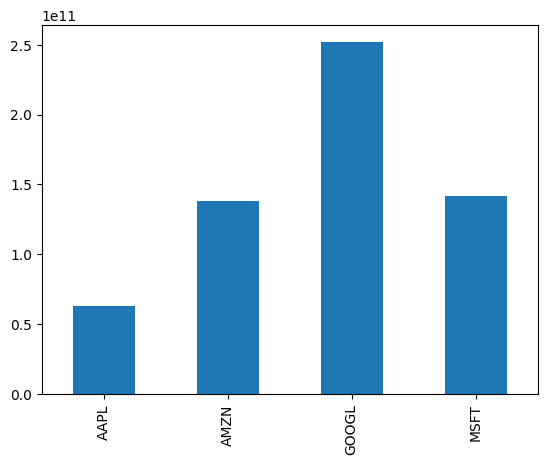

In [7]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :]["2021"].plot(kind="bar")

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [8]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
symbol,AAPL,MSFT,GOOGL,AMZN
price,196.45,335.92,132.72,133.68
beta,1.292349,0.91086,1.052595,1.257855
volAvg,56926808,28866006,34799512,59553403
mktCap,3089903196723,2497729730929,1687309229619,1371610289111
lastDiv,0.96,2.72,0,0.2
range,124.17-198.23,213.43-366.78,83.34-133.74,81.43-146.57
changes,0.62,-2.45,0.14,1.47
companyName,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property.

In [9]:
ratios = companies.ratios

help(ratios)

Help on Ratios in module financetoolkit.base.ratios_controller object:

class Ratios(builtins.object)
 |  Ratios(tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame, custom_ratios: dict | None = None)
 |  
 |  Ratios Controller Class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame, custom_ratios: dict | None = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  collect_all_ratios(self, include_dividends: bool = False, diluted: bool = True, days: int = 365)
 |      Calculates all Ratios based on the data provided.
 |  
 |  collect_custom_ratios(self, overwrite: bool = False)
 |      Calculates all Custom Ratios based on the data provided.
 |  
 |  coll

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [10]:
ratios.collect_valuation_ratios()

2000          2001          2002  \
AAPL Earnings per Share (EPS)        3.895304e-02 -1.911717e-03  3.208299e-03   
     Revenue per Share (RPS)         3.956261e-01  2.770956e-01  2.834162e-01   
     Price-to-Earnings (PE)          5.795851e+00 -1.738688e+02  6.779107e+01   
     Earnings per Share Growth                NaN -1.049077e+00 -2.678229e+00   
     Price-to-Earnings-Growth (PEG)  1.487907e+02  9.094903e+04  2.112991e+04   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.013241e+01  2.026610e+01  1.526173e+01   
     EV-to-EBITDA                    1.228158e+01  1.704639e+01  1.352227e+01   
     EV-to-Operating-Cash-Flow       1.036030e+01  1.683557e+01  1.211030e+01   
     Tangible Asset Value            4.136800e+10  4.728900e+10  5.218000e+10   
     Net Current Asset Value         2.055300e+10  2.850500e+10  3.583200e+10   

                                             2003          2004          2005  \
AAPL Earnings per Share (EPS)        3.389981e-03  1.272257e-02  5.564219e-02   
     Revenue per Share (RPS)         3.049509e-01  3.816310e-01  5.806378e-01   
     Price-to-Earnings (PE)          9.567723e+01  7.682677e+01  3.921894e+01   
     Earnings per Share Growth       5.662893e-02  2.752992e+00  3.373502e+00   
     Price-to-Earnings-Growth (PEG)  2.822353e+04  6.038619e+03  7.048418e+02   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.226528e+01  1.544559e+01  1.189626e+01   
     EV-to-EBITDA                    1.232386e+01  1.843193e+01  1.283154e+01   
     EV-to-Operating-Cash-Flow       1.143372e+01  1.287942e+01  1.191274e+01   
     Tangible Asset Value            6.102000e+10  7.482500e+10  4.811500e+10   
     Net Current Asset Value         4.499900e+10  5.559700e+10  3.186000e+10   

                                             2006          2007          2008  \
AAPL Earnings per Share (EPS)        8.094998e-02  1.404006e-01  1.913706e-01   
     Revenue per Share (RPS)         7.860980e-01  9.640896e-01  1.285793e+00   
     Price-to-Earnings (PE)          3.181379e+01  4.282559e+01  1.353817e+01   
     Earnings per Share Growth       4.548309e-01  7.344119e-01  3.630323e-01   
     Price-to-Earnings-Growth (PEG)  3.930056e+02  3.050242e+02  7.074321e+01   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.204557e+01  1.248942e+01  5.318772e+00   
     EV-to-EBITDA                    1.266050e+01  1.257513e+01  5.159737e+00   
     EV-to-Operating-Cash-Flow       1.527188e+01  1.410709e+01  5.860690e+00   
     Tangible Asset Value            3.623800e+10  2.633700e+10  2.417800e+10   
     Net Current Asset Value         2.656800e+10  1.641400e+10  1.335600e+10   

                                             2009  ...          2014  \
AAPL Earnings per Share (EPS)        2.246011e-01  ...  1.613269e+00   
     Revenue per Share (RPS)         1.438683e+00  ...  7.463868e+00   
     Price-to-Earnings (PE)          2.848040e+01  ...  1.535229e+01   
     Earnings per Share Growth       1.736447e-01  ...  1.362851e-01   
     Price-to-Earnings-Growth (PEG)  1.268044e+02  ...  9.516263e+00   
...                                           ...  ...           ...   
MSFT EV-to-EBIT                      1.051949e+01  ...  1.241817e+01   
     EV-to-EBITDA                    9.095173e+00  ...  1.070295e+01   
     EV-to-Operating-Cash-Flow       1.095272e+01  ...  1.094868e+01   
     Tangible Asset Value            2.705500e+10  ...  6.965700e+10   
     Net Current Asset Value         2.224600e+10  ...  6.862100e+10   

                                             2015          2016          2017  \
AAPL Earnings per Share (EPS)        2.304219e+00  2.076576e+00  2.301687e+00   
     Revenue per Share (RPS)         1.008598e+01  9.801272e+00  1.091239e+01   
     Price-to-Earn

In [11]:
ratios.get_effective_tax_rate()

date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
AAPL,0.280220,0.288462,0.252874,0.260870,0.279373,0.264463,0.294180,0.301917,0.298912,0.285571,...,0.261261,0.263683,0.255573,0.245565,0.183422,0.159438,0.144282,0.133023,0.162045,NaN
AMZN,-0.000000,-0.000000,-0.000000,0.000000,-0.653556,0.221963,0.496021,0.278788,0.274140,0.217916,...,-1.504505,0.605867,0.366136,0.202049,0.106296,0.169863,0.118413,0.125580,0.541947,NaN
GOOGL,-0.000000,0.306218,0.461071,0.695235,0.386192,0.315771,0.232756,0.259123,0.277904,0.222014,...,0.193001,0.168083,0.193458,0.534365,0.119640,0.133300,0.162493,0.162023,0.159208,NaN
MSFT,0.340035,0.330065,0.319986,0.321404,0.330272,0.263050,0.310097,0.300284,0.257538,0.264971,...,0.206542,0.341168,0.149511,0.084021,0.545676,0.101813,0.165077,0.138266,0.131134,0.189786


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [12]:
ratios.collect_solvency_ratios(diluted=False)

date                                      2000       2001       2002  \
AAPL  Debt-to-Assets Ratio            0.044098   0.052649   0.050175   
      Debt-to-Equity Ratio            0.073046   0.080867   0.077167   
      Debt Service Coverage Ratio     0.432488  -0.226614   0.101327   
      Equity Multiplier                    NaN   1.597608   1.536993   
      Free Cash Flow Yield            0.175217  -0.007306  -0.019658   
      Net-Debt to EBITDA Ratio       -0.968478   8.235537  -6.769231   
      Cash Flow Coverage Ratio        0.175217  -0.007306  -0.019658   
      CAPEX Coverage Ratio           -7.719626  -0.797414  -0.511494   
      Dividend CAPEX Coverage Ratio  -7.719626  -0.797414  -0.511494   
AMZN  Debt-to-Assets Ratio            1.004155   1.325840   1.150807   
      Debt-to-Equity Ratio           -2.216634  -1.507726  -1.693228   
      Debt Service Coverage Ratio    -0.886071  -0.447418   0.060156   
      Equity Multiplier                    NaN  -1.567230  -1.299047   
      Free Cash Flow Yield           -0.048567  -0.043165   0.018906   
      Net-Debt to EBITDA Ratio       -2.887822 -11.130894  10.221292   
      Cash Flow Coverage Ratio       -0.048567  -0.043165   0.018906   
      CAPEX Coverage Ratio            0.967972   2.380358  -4.450400   
      Dividend CAPEX Coverage Ratio   0.967972   2.380358  -4.450400   
GOOGL Debt-to-Assets Ratio            0.000000        NaN   0.037861   
      Debt-to-Equity Ratio            0.000000        NaN   0.062442   
      Debt Service Coverage Ratio         -inf        NaN   2.083233   
      Equity Multiplier                    NaN        NaN        NaN   
      Free Cash Flow Yield                 NaN        NaN        NaN   
      Net-Debt to EBITDA Ratio       -0.000000        NaN  -0.217639   
      Cash Flow Coverage Ratio             NaN        NaN        NaN   
      CAPEX Coverage Ratio                 NaN  -2.384615  -4.174015   
      Dividend CAPEX Coverage Ratio        NaN  -2.384615  -4.174015   
MSFT  Debt-to-Assets Ratio            0.000000   0.000000   0.000000   
      Debt-to-Equity Ratio            0.000000   0.000000   0.000000   
      Debt Service Coverage Ratio     1.130600   1.052821   0.934557   
      Equity Multiplier                    NaN   1.256607   1.275805   
      Free Cash Flow Yield            0.093365   0.055924   0.078963   
      Net-Debt to EBITDA Ratio       -0.411480  -0.295866  -0.232107   
      Cash Flow Coverage Ratio        0.093365   0.055924   0.078963   
      CAPEX Coverage Ratio          -15.882821 -12.168631 -18.842857   
      Dividend CAPEX Coverage Ratio -15.651345 -12.168631 -18.842857   

date                                      2003       2004        2005  \
AAPL  Debt-to-Assets Ratio            0.044607   0.000000    0.000000   
      Debt-to-Equity Ratio            0.071987   0.000000    0.000000   
      Debt Service Coverage Ratio     0.037760   0.121642    0.473594   
      Equity Multiplier               1.576461   1.598559    1.562829   
      Free Cash Flow Yield            0.019083   0.037267    0.046055   
      Net-Debt to EBITDA Ratio      -15.306931  -6.237395   -1.908693   
      Cash Flow Coverage Ratio        0.019083   0.037267    0.046055   
      CAPEX Coverage Ratio           -1.762195  -5.306818   -9.750000   
      Dividend CAPEX Coverage Ratio  -1.762195  -5.306818   -9.750000   
AMZN  Debt-to-Assets Ratio            0.901769   0.571863    0.411526   
      Debt-to-Equity Ratio           -1.881712  -8.176101    6.182927   
      Debt Service Coverage Ratio     0.216009   0.271800    0.223950   
      Equity Multiplier              -1.738225  -4.282802  369.604982   
      Free Cash Flow Yield            0.016629   0.026555    0.027232   
      Net-Debt to EBITDA Ratio        2.428690   1.075465    0.918626   
      Cash Flow Coverage Ratio        0.016629   0.026555    0.027232   
      CAPEX Coverage Ratio           -8.529078  -6.356344   -3.593137   
      Dividend CAPEX 

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [13]:
ratios.collect_all_ratios()

2000          2001  \
AAPL Days of Inventory Outstanding (DIO)                  NaN  1.945252e+00   
     Days of Sales Outstanding (DSO)                      NaN  4.828781e+01   
     Operating Cycle (CC)                                 NaN  5.023306e+01   
     Days of Accounts Payable Outstanding (DPO)           NaN  8.656371e+01   
     Cash Conversion Cycle (CCC)                          NaN -3.633065e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.013241e+01  2.026610e+01   
     EV-to-EBITDA                                1.228158e+01  1.704639e+01   
     EV-to-Operating-Cash-Flow                   1.036030e+01  1.683557e+01   
     Tangible Asset Value                        4.136800e+10  4.728900e+10   
     Net Current Asset Value                     2.055300e+10  2.850500e+10   

                                                         2002          2003  \
AAPL Days of Inventory Outstanding (DIO)         2.469195e+00  4.097022e+00   
     Days of Sales Outstanding (DSO)             3.276863e+01  4.454447e+01   
     Operating Cycle (CC)                        3.523783e+01  4.864149e+01   
     Days of Accounts Payable Outstanding (DPO)  7.548683e+01  8.376584e+01   
     Cash Conversion Cycle (CCC)                -4.024900e+01 -3.512435e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.526173e+01  1.226528e+01   
     EV-to-EBITDA                                1.352227e+01  1.232386e+01   
     EV-to-Operating-Cash-Flow                   1.211030e+01  1.143372e+01   
     Tangible Asset Value                        5.218000e+10  6.102000e+10   
     Net Current Asset Value                     3.583200e+10  4.499900e+10   

                                                         2004          2005  \
AAPL Days of Inventory Outstanding (DIO)         4.759551e+00  4.909486e+00   
     Days of Sales Outstanding (DSO)             4.408745e+01  3.094286e+01   
     Operating Cycle (CC)                        4.884700e+01  3.585235e+01   
     Days of Accounts Payable Outstanding (DPO)  7.897218e+01  5.961519e+01   
     Cash Conversion Cycle (CCC)                -3.012517e+01 -2.376284e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.544559e+01  1.189626e+01   
     EV-to-EBITDA                                1.843193e+01  1.283154e+01   
     EV-to-Operating-Cash-Flow                   1.287942e+01  1.191274e+01   
     Tangible Asset Value                        7.482500e+10  4.811500e+10   
     Net Current Asset Value                     5.559700e+10  3.186000e+10   

                                                         2006          2007  \
AAPL Days of Inventory Outstanding (DIO)         5.787526e+00  7.091850e+00   
     Days of Sales Outstanding (DSO)             3.927789e+01  5.225798e+01   
     Operating Cycle (CC)                        4.506542e+01  5.934983e+01   
     Days of Accounts Payable Outstanding (DPO)  6.877178e+01  9.624653e+01   
     Cash Conversion Cycle (CCC)                -2.370636e+01 -3.689670e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.204557e+01  1.248942e+01   
     EV-to-EBITDA                                1.266050e+01  1.257513e+01   
     EV-to-Operating-Cash-Flow                   1.527188e+01  1.410709e+01   
     Tangible Asset Value                        3.623800e+10  2.633700e+10   
     Net Current Asset Value                     2.656800e+10  1.641400e+10   

                                                         2008          2009  \
AAPL Days of Inventory Outstanding (DIO)         7.314029e+00  7.519340e+00   
     Days of Sales Outstanding (DSO)             3.624827e+01  2.888572e+01   
     Operating Cycle (CC

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property.

In [14]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [15]:
models.get_dupont_analysis()

date                         2000      2001      2002      2003      2004  \
AAPL  Net Profit Margin  0.098459 -0.006899  0.011320  0.011116  0.033337   
      Asset Turnover          NaN  0.836400  0.932219  0.946694  1.113892   
      Equity Multiplier       NaN  1.597608  1.536993  1.576461  1.598559   
      Return on Equity        NaN -0.009219  0.016220  0.016591  0.059361   
AMZN  Net Profit Margin -0.510964 -0.178308 -0.038122  0.006703  0.085022   
      Asset Turnover          NaN  1.655271  2.168104  2.535206  2.558385   
      Equity Multiplier       NaN -1.567230 -1.299047 -1.738225 -4.282802   
      Return on Equity        NaN  0.462564  0.107371 -0.029538 -0.931596   
GOOGL Net Profit Margin -0.768788  0.080821  0.226744  0.072069  0.125146   
      Asset Turnover          NaN       NaN       NaN  2.531073  1.524190   
      Equity Multiplier       NaN       NaN       NaN  1.518703  1.189601   
      Return on Equity        NaN       NaN       NaN  0.277028  0.226912   
MSFT  Net Profit Margin  0.410394  0.290402  0.276009  0.310467  0.221746   
      Asset Turnover          NaN  0.454119  0.447034  0.437273  0.428414   
      Equity Multiplier       NaN  1.256607  1.275805  1.300504  1.265854   
      Return on Equity        NaN  0.165717  0.157416  0.176555  0.120255   

date                           2005       2006      2007      2008      2009  \
AAPL  Net Profit Margin    0.095829   0.102977  0.145630  0.148835  0.156116   
      Asset Turnover       1.421458   1.343372  1.128314  1.000601  0.782184   
      Equity Multiplier    1.562829   1.647908  1.735683  1.825516  1.911977   
      Return on Equity     0.212885   0.227966  0.285202  0.271863  0.233474   
AMZN  Net Profit Margin    0.039223   0.017739  0.032086  0.033653  0.036803   
      Asset Turnover       2.445098   2.658146  2.735066  2.590175  2.215303   
      Equity Multiplier  369.604982  11.903988  6.663391  3.825019  2.790642   
      Return on Equity    35.446272   0.561300  0.584767  0.333419  0.227519   
GOOGL Net Profit Margin    0.238720   0.290190  0.253328  0.193932  0.275699   
      Asset Turnover       0.903715   0.737857  0.757558  0.763372  0.654557   
      Equity Multiplier    1.100190   1.086412  1.102685  1.121245  1.124858   
      Return on Equity     0.237349   0.232622  0.211617  0.165992  0.202993   
MSFT  Net Profit Margin    0.307982   0.284517  0.275126  0.292635  0.249311   
      Asset Turnover       0.487586   0.630744  0.770095  0.888765  0.775639   
      Equity Multiplier    1.327509   1.591630  1.864693  2.017779  1.986723   
      Return on Equity     0.199349   0.285630  0.395079  0.524791  0.384183   

date                     ...      2014      2015      2016      2017  \
AAPL  Net Profit Margin  ...  0.216144  0.228458  0.211868  0.210924   
      Asset Turnover     ...  0.833085  0.894915  0.704513  0.657769   
      Equity Multiplier  ...  1.866637  2.262077  2.472355  2.657322   
      Return on Equity   ...  0.336118  0.462482  0.369033  0.368675   
AMZN  Net Profit Margin  ... -0.002708  0.005570  0.017435  0.017052   
      Asset Turnover     ...  1.880081  1.784192  1.827217  1.656787   
      Equity Multiplier  ...  4.620686  4.971979  4.556185  4.568924   
      Return on Equity   ... -0.023527  0.049409  0.145153  0.129080   
GOOGL Net Profit Margin  ...  0.218845  0.218005  0.215770  0.114221   
      Asset Turnover     ...  0.545343  0.538339  0.573232  0.607771   
      Equity Multiplier  ...  1.261948  1.239126  1.214333  1.251267   
      Return on Equity   ...  0.150608  0.145425  0.150196  0.086863   
MSFT  Net Profit Margin  ...  0.254212  0.130295  0.196882  0.235731   
      Asset Turnover     ...  0.551645  0.536880  0.461293  0.413772   
      Equity Multiplier  ...  1.865814  2.052235  2.432384  3.011130   
      Return on Equity   ...  0.261652  0.143559  0.220910  0.293703   

date                         2018      2019      2020      2021      2022  \
AAPL  Net Profit Margin  0.

In [16]:
models.get_extended_dupont_analysis()

date                               2000      2001      2002      2003  \
AAPL  Interest Burden Ratio    0.765568  6.615385  1.931034  0.967391   
      Tax Burden Ratio         0.940191  0.107558  0.386905  0.775281   
      Operating Profit Margin  0.136791 -0.009696  0.015152  0.014822   
      Asset Turnover                NaN  0.836400  0.932219  0.946694   
      Equity Multiplier             NaN  1.597608  1.536993  1.576461   
      Return on Equity              NaN -0.009219  0.016220  0.016591   
AMZN  Interest Burden Ratio    0.780607  0.783123 -0.439917  7.575872   
      Tax Burden Ratio         1.633645  1.350502 -2.338173  0.130387   
      Operating Profit Margin -0.400682 -0.168595 -0.037062  0.006786   
      Asset Turnover                NaN  1.655271  2.168104  2.535206   
      Equity Multiplier             NaN -1.567230 -1.299047 -1.738225   
      Return on Equity              NaN  0.462564  0.107371 -0.029538   
GOOGL Interest Burden Ratio    1.003199  1.088995  1.008388  0.987913   
      Tax Burden Ratio         0.996811  0.637085  0.534446  0.308494   
      Operating Profit Margin -0.768788  0.116493  0.420732  0.236473   
      Asset Turnover                NaN       NaN       NaN  2.531073   
      Equity Multiplier             NaN       NaN       NaN  1.518703   
      Return on Equity              NaN       NaN       NaN  0.277028   
MSFT  Interest Burden Ratio    0.772609  1.016920  1.034483  0.897528   
      Tax Burden Ratio         0.854203  0.626792  0.657347  0.756072   
      Operating Profit Margin  0.621842  0.455606  0.405888  0.457514   
      Asset Turnover                NaN  0.454119  0.447034  0.437273   
      Equity Multiplier             NaN  1.256607  1.275805  1.300504   
      Return on Equity              NaN  0.165717  0.157416  0.176555   

date                               2004        2005       2006      2007  \
AAPL  Interest Burden Ratio    0.851175    0.909091   0.870476  0.880391   
      Tax Burden Ratio         0.846626    0.809091   0.810844  0.792924   
      Operating Profit Margin  0.046262    0.130285   0.145897  0.208615   
      Asset Turnover           1.113892    1.421458   1.343372  1.128314   
      Equity Multiplier        1.598559    1.562829   1.647908  1.735683   
      Return on Equity         0.059361    0.212885   0.227966  0.285202   
AMZN  Interest Burden Ratio    1.237601    1.009346   1.031830  0.992424   
      Tax Burden Ratio         1.336098    0.770833   0.488432  0.726718   
      Operating Profit Margin  0.051418    0.050412   0.035197  0.044489   
      Asset Turnover           2.558385    2.445098   2.658146  2.735066   
      Equity Multiplier       -4.282802  369.604982  11.903988  6.663391   
      Return on Equity        -0.931596   35.446272   0.561300  0.584767   
GOOGL Interest Burden Ratio    0.984556    0.941915   0.885056  0.896091   
      Tax Burden Ratio         0.623436    0.726423   0.866887  0.826788   
      Operating Profit Margin  0.203885    0.348889   0.378225  0.341930   
      Asset Turnover           1.524190    0.903715   0.737857  0.757558   
      Equity Multiplier        1.189601    1.100190   1.086412  1.102685   
      Return on Equity         0.226912    0.237349   0.232622  0.211617   
MSFT  Interest Burden Ratio    0.740735    0.875692   0.901982  0.921546   
      Tax Burden Ratio         0.904140    0.841563   0.764874  0.759285   
      Operating Profit Margin  0.331098    0.417915   0.412402  0.393197   
      Asset Turnover           0.428414    0.487586   0.630744  0.770095   
      Equity Multiplier        1.265854    1.327509   1.591630  1.864693   
      Return on Equity         0.120255    0.199349   0.285630  0.395079   

date                               2008      2009  ...      2014      2015  \
AAPL  Interest Burden Ratio    0.910080  0.959168  ...  0.981676  0.982280   
      Tax Burden Ratio         0.770359  0.744842  ...  0.752528  0.749600   
      Operating Profit Margin  0.212291

# Calling Functions Directly

While the `Toolkit` package itself is class-based, this doesn't mean that you are unable to call each functionality individually as well. This accepts virtually any input, from `np.array` to `pd.Series` and regular `floats`.

In [17]:
from financetoolkit.historical import price

price.get_sharpe_ratio(
    returns=np.array([0.09, 0.6, 0.075]), risk_free_rate=np.array([0.01, 0.03, 0.03])
)

price.get_sharpe_ratio(
    returns=pd.Series([0.10, 0.5, 0.075]), risk_free_rate=pd.Series([0.005, 0.02, 0.03])
)

price.get_sharpe_ratio(returns=pd.Series([0.08, 0.3, 0.025]), risk_free_rate=0.01)

0    0.481046
1    1.992904
2    0.103081
dtype: float64

It is also relatively straight forward to group a selection of ratios into one DataFrame.

In [18]:
from financetoolkit.ratios import (
    efficiency,
    liquidity,
    profitability,
    solvency,
    valuation,
)

# Note: this is dummy data, not actual data

asset_turnover = efficiency.get_asset_turnover_ratio(
    sales=pd.Series([100, 110, 120, 130, 80]),
    total_assets_begin=pd.Series([500, 400, 300, 200, 100]),
    total_assets_end=pd.Series([500, 430, 320, 200, 100]),
)

quick_ratio = liquidity.get_quick_ratio(
    cash_and_equivalents=pd.Series([100, 110, 120, 130, 80]),
    accounts_receivable=pd.Series([30, 20, 30, 20, 40]),
    marketable_securities=pd.Series([30, 10, 30, 20, 40]),
    current_liabilities=pd.Series([130, 120, 110, 150, 100]),
)

return_on_assets = profitability.get_return_on_assets(
    net_income=pd.Series([80, 40, 40, 30, 20]),
    total_assets=pd.Series([200, 300, 400, 500, 450]),
)

debt_to_assets = solvency.get_debt_to_assets_ratio(
    total_debt=pd.Series([100, 110, 120, 130, 80]),
    total_assets=pd.Series([200, 140, 160, 160, 300]),
)

price_to_earnings = valuation.get_price_earnings_ratio(
    stock_price=pd.Series([30, 11, 12, 10, 30]),
    earnings_per_share=pd.Series([0.5, 0.4, 0.1, 1.1, 1.2]),
)

components = {
    "Asset Turnover": asset_turnover,
    "Quick Ratio": quick_ratio,
    "Return on Assets": return_on_assets,
    "Debt to Assets": debt_to_assets,
    "Price to Earnings": price_to_earnings,
}


pd.DataFrame(components)

,Asset Turnover,Quick Ratio,Return on Assets,Debt to Assets,Price to Earnings
0,0.200000,1.230769,0.400000,0.500000,60.000000
1,0.265060,1.166667,0.133333,0.785714,27.500000
2,0.387097,1.636364,0.100000,0.750000,120.000000
3,0.650000,1.133333,0.060000,0.812500,9.090909
4,0.800000,1.600000,0.044444,0.266667,25.000000


This returns the following table which closely resembles the proper Dupont analysis for Apple at their given reporting dates in October.

In [19]:
from financetoolkit.models import dupont

years = [2018, 2019, 2020, 2021, 2022]

dupont.get_dupont_analysis(
    net_income=pd.Series(
        [59531000000, 55256000000, 57411000000, 94680000000, 99803000000], index=years
    ),
    total_revenue=pd.Series(
        [265595000000, 260174000000, 274515000000, 365817000000, 394328000000],
        index=years,
    ),
    total_assets_begin=pd.Series(
        [np.nan, 365725000000, 338516000000, 323888000000, 351002000000],
        index=years,
    ),
    total_assets_end=pd.Series(
        [365725000000, 338516000000, 323888000000, 351002000000, 352755000000],
        index=years,
    ),
    total_equity_begin=pd.Series(
        [np.nan, 107147000000, 90488000000, 65339000000, 63090000000], index=years
    ),
    total_equity_end=pd.Series(
        [107147000000, 90488000000, 65339000000, 63090000000, 50672000000], index=years
    ),
)

,2018,2019,2020,2021,2022
Net Profit Margin,0.224142,0.212381,0.209136,0.258818,0.253096
Asset Turnover,NaN,0.738878,0.828845,1.084079,1.120637
Equity Multiplier,NaN,3.563342,4.250894,5.254966,6.186222
Return on Equity,NaN,0.559172,0.736856,1.474433,1.754593
